In [1]:
import pandas as pd
import re 
from pprint import pprint
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
all_data = pd.read_csv('./Dataset/train_healthy.csv')
all_data.head()

,recipe_id,groups,category,name,n_ingredients,minutes,calories,total fat (PDV),sugar (PDV),sodium (PDV),...,log sugar,log sodium,log protein,log sat fat,log carbs,user_id,date,review,rating,description
0,5315,2,beverages,icy holiday punch,6,1440,54.5,0.0,50.0,0.0,...,3.912023,0.000000,0.000000,0.000000,1.386294,8629,2001-04-24,I brought this to an office holiday party and ...,4,.
1,8661,1,salads,oliveau salad dressing,8,20,168.7,28.0,3.0,3.0,...,1.098612,1.098612,0.000000,2.484907,0.000000,13483,2001-08-05,Good recipe and easy to make. I found it a li...,4,traditional french dressing -- this recipe was...
2,10859,2,vegetables,broccoli cauliflower and rice casserole,5,85,228.8,24.0,12.0,46.0,...,2.484907,3.828641,2.890372,3.465736,1.386294,8629,2001-08-15,This is a nice casserole. It is very easy to ...,2,easy and quick to prepare. grandmother's recip...
3,902,2,vegetables,microwaved garlic mushroom rolls,7,0,1188.6,88.0,53.0,69.0,...,3.970292,4.234107,4.317488,5.030438,3.828641,13483,2001-08-16,Very easy to make for a lunch. I served it co...,3,"i use brown flat mushrooms and slice them, i f..."
4,8430,2,desserts,lemon blueberry bundt cake,10,70,234.0,13.0,89.0,10.0,...,4.488636,2.302585,1.791759,3.258097,2.484907,13483,2001-09-04,I made this and froze it. I served it a week ...,4,delicious bundt cake


In [3]:
all_data.columns

Index(['recipe_id', 'groups', 'category', 'name', 'n_ingredients', 'minutes',
       'calories', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)',
       'protein (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)',
       'log calories', 'log fat', 'log sugar', 'log sodium', 'log protein',
       'log sat fat', 'log carbs', 'user_id', 'date', 'review', 'rating',
       'description'],
      dtype='object')

In [4]:
to_use_df = all_data[['recipe_id', 'groups', 'category', 'name', 'minutes', 'n_ingredients']]
to_use_df.drop_duplicates(inplace=True)
to_use_df.head()

,recipe_id,groups,category,name,minutes,n_ingredients
0,5315,2,beverages,icy holiday punch,1440,6
1,8661,1,salads,oliveau salad dressing,20,8
2,10859,2,vegetables,broccoli cauliflower and rice casserole,85,5
3,902,2,vegetables,microwaved garlic mushroom rolls,0,7
4,8430,2,desserts,lemon blueberry bundt cake,70,10


# Item Profile (Item x Feature Matrix) 

In [5]:
item_df = to_use_df[['recipe_id', 'category', 'minutes', 'n_ingredients']]
item_df.drop_duplicates(inplace=True)
item_df.head()

,recipe_id,category,minutes,n_ingredients
0,5315,beverages,1440,6
1,8661,salads,20,8
2,10859,vegetables,85,5
3,902,vegetables,0,7
4,8430,desserts,70,10


### One-hot encoding of category

In [6]:
item_df = pd.concat([item_df, pd.get_dummies(item_df['category'], prefix = 'cat')], axis = 1).drop('category', axis=1)

### One-hot encoding of cooking time (minutes)

In [7]:
# transforming cooking time into bins
item_df['minutes'] = pd.qcut(to_use_df['minutes'], q=4)

# one-hot encoding
one_hot_minutes = pd.get_dummies(item_df['minutes'], prefix = 'minutes')
one_hot_minutes.columns

Index(['minutes_(-0.001, 20.0]', 'minutes_(20.0, 35.0]',
       'minutes_(35.0, 65.0]', 'minutes_(65.0, 2147483647.0]'],
      dtype='object')

In [8]:
# rename columns (1 - fastest, 4 - slowest)
one_hot_minutes.rename(columns = {'minutes_(-0.001, 20.0]':'minutes_1', 'minutes_(20.0, 35.0]': 'minutes_2', 
                        'minutes_(35.0, 65.0]': 'minutes_3', 'minutes_(65.0, 2147483647.0]': 'minutes_4'}, inplace=True)
item_df = pd.concat([item_df, one_hot_minutes], axis=1).drop(['minutes'], axis=1)
item_df

,recipe_id,n_ingredients,cat_beverages,cat_breads,cat_burgers,cat_desserts,cat_meat,cat_pasta,cat_salads,cat_seafood,cat_soup,cat_vegetables,minutes_1,minutes_2,minutes_3,minutes_4
0,5315,6,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,8661,8,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,10859,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,902,7,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4,8430,10,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65173,191893,10,0,0,0,0,0,1,0,0,0,0,0,0,0,1
65179,268004,9,0,0,0,0,0,0,0,0,1,0,0,1,0,0
65180,145707,9,0,0,0,0,0,0,0,0,1,0,0,0,0,1
65181,89292,14,0,0,0,0,0,0,0,0,0,1,1,0,0,0


### One-hot encoding of ingredients (n_ingredients)

In [9]:
# transforming cooking time into bins
item_df['n_ingredients'] = pd.qcut(to_use_df['n_ingredients'], q=4)

# one-hot encoding
one_hot_ingred = pd.get_dummies(item_df['n_ingredients'], prefix = 'ingred')
one_hot_ingred.columns

Index(['ingred_(0.999, 6.0]', 'ingred_(6.0, 9.0]', 'ingred_(9.0, 11.0]',
       'ingred_(11.0, 43.0]'],
      dtype='object')

In [10]:
# rename columns  (1 - least, 4 - most)
one_hot_ingred.rename(columns = {'ingred_(0.999, 6.0]':'ingred_1', 'ingred_(6.0, 9.0]': 'ingred_2', 
                                'ingred_(9.0, 11.0]': 'ingred_3', 'ingred_(11.0, 43.0]': 'ingred_4'}, inplace=True)
item_df = pd.concat([item_df, one_hot_ingred], axis=1).drop(['n_ingredients'], axis=1)
item_df

,recipe_id,cat_beverages,cat_breads,cat_burgers,cat_desserts,cat_meat,cat_pasta,cat_salads,cat_seafood,cat_soup,cat_vegetables,minutes_1,minutes_2,minutes_3,minutes_4,ingred_1,ingred_2,ingred_3,ingred_4
0,5315,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,8661,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
2,10859,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
3,902,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
4,8430,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65173,191893,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
65179,268004,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
65180,145707,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
65181,89292,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1


### TFIDF of features

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [12]:
reviews_df = pd.read_csv('./Dataset/train_food_noun.csv')
reviews_df.head()

,recipe_id,name,review,clean_review,noun_review
0,5315,icy holiday punch,I brought this to an office holiday party and ...,"['brought', 'office', 'holiday', 'party', 'eve...",[]
1,8661,oliveau salad dressing,Good recipe and easy to make. I found it a li...,"['good', 'recipe', 'easy', 'make', 'found', 'l...",[]
2,10859,broccoli cauliflower and rice casserole,This is a nice casserole. It is very easy to ...,"['nice', 'casserole', 'easy', 'put', 'together']",[]
3,902,microwaved garlic mushroom rolls,Very easy to make for a lunch. I served it co...,"['easy', 'make', 'lunch', 'served', 'cold', 's...","['cheese', 'cheddar']"
4,8549,taverns,A friend of mine loves ketchup so he loved thi...,"['friend', 'mine', 'loves', 'ketchup', 'loved'...",[]


In [13]:
reviews_df['noun_review']  = reviews_df['noun_review'].map(lambda x: re.sub("[^A-Za-z0-9]+"," ", x))
reviews_df.head()

,recipe_id,name,review,clean_review,noun_review
0,5315,icy holiday punch,I brought this to an office holiday party and ...,"['brought', 'office', 'holiday', 'party', 'eve...",
1,8661,oliveau salad dressing,Good recipe and easy to make. I found it a li...,"['good', 'recipe', 'easy', 'make', 'found', 'l...",
2,10859,broccoli cauliflower and rice casserole,This is a nice casserole. It is very easy to ...,"['nice', 'casserole', 'easy', 'put', 'together']",
3,902,microwaved garlic mushroom rolls,Very easy to make for a lunch. I served it co...,"['easy', 'make', 'lunch', 'served', 'cold', 's...",cheese cheddar
4,8549,taverns,A friend of mine loves ketchup so he loved thi...,"['friend', 'mine', 'loves', 'ketchup', 'loved'...",


In [14]:
# Combine the reviews by recipe
review_noun = reviews_df.groupby('recipe_id')['noun_review'].apply(lambda x: "{,}".join(x))
review_noun_df = review_noun.to_frame()
review_noun_df.head()

,noun_review
recipe_id,
40,mineral water
46,go
58,beef
62,rock side game
91,tender celery onion rice


In [15]:
corpus = review_noun_df['noun_review'].to_list()
corpus[:5]

[' mineral water ',
 ' go ',
 ' beef ',
 ' rock side game ',
 ' tender celery onion rice ']

In [16]:
datavect = vectorizer.fit_transform(corpus)
dataArray = datavect.toarray()
feature_names = vectorizer.get_feature_names()

In [17]:
cv_df = pd.DataFrame(dataArray, index = review_noun_df.index, columns = feature_names)
cv_df

,abandon,ambulance,anchovy,angle,ante,apple,apricot,arm,artichoke,asparagus,...,water,weather,wheat,wheel,whitefish,whiting,workhorse,yield,yogurt,ziti
recipe_id,,,,,,,,,,,,,,,,,,,,,
40,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417765,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
418085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
418094,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Manually change extract list of extracted_features

extracted_features = ['chip', 'heat', 'liver', 'mouth', 'freeze', 'result', 'puff', 'chop', 'weather', 'leg', 'tongue', 'arm',
                      'flood', 'neck', 'shoulder', 'brain', 'joint', 'chinook', 'cock', 'rice', 'chocolate', 'pasta', 
                      'marzipan', 'spaghetti', 'couscous', 'feed', 'barley', 'caramel', 'fudge', 'butterscotch', 'lasagna', 
                      'pastry', 'jam', 'pickle', 'marshmallow', 'spill', 'brittle', 'patty', 'cannelloni', 'cure', 'slop', 
                      'praline', 'fuel', 'taffy', 'groats', 'sling', 'nougat', 'lollipop', 'fondant', 'timbale', 'conserve', 
                      'coal', 'cheddar', 'desert', 'side', 'top', 'bottom', 'sole', 'tenderloin', 'letter', 'port', 'galloway', 
                      'bologna', 'angle', 'border', 'seat', 'render', 'durham', 'cling', 'apple', 'berry', 'citrus', 'avocado',
                      'melon', 'grape', 'pear', 'mushroom', 'beef', 'salmon', 'lamb', 'crab', 'fish', 'bird', 'clam', 'buffalo',
                      'poultry', 'snapper', 'nan', 'fly', 'bear', 'rabbit', 'hen', 'kitten', 'fingerling', 'parrot', 'longhorn',
                      'porter', 'liza', 'shark', 'charolais', 'skip', 'blast', 'bother', 'save', 'kill', 'hold', 'step', 'deal',
                      'turning', 'slicing', 'pass', 'game', 'burst', 'charge', 'sacrifice', 'yield', 'kiss', 'manufacture', 
                      'maintenance', 'offer', 'carry', 'spin', 'stroke', 'crop', 'reward', 'hop', 'ride', 'bowling', 'tap', 
                      'production', 'curling', 'bid', 'pulse', 'chase', 'sniff', 'demonstration', 'discharge', 'electric', 
                      'cake', 'store', 'bar', 'bed', 'grate', 'ambulance', 'stick', 'rack', 'ramp', 'duplicate', 'machine', 
                      'cart', 'bow', 'key', 'perch', 'rosette', 'tube', 'hat', 'motor', 'matchstick', 'patch', 'match', 'rock',
                      'computer', 'rib', 'slit', 'bucket', 'uniform', 'release', 'plane', 'hook', 'tool', 'block', 'pump', 
                      'wheel', 'bus', 'raft', 'remake', 'cutout', 'assembly', 'oeuvre', 'slat', 'compact', 'output', 'cab', 
                      'gazette', 'tablet', 'charcuterie', 'terrace', 'digest', 'map', 'stencil', 'pike', 'vault', 'workhorse',
                      'clip', 'gate', 'rail', 'convertible', 'pie', 'leftovers', 'pork', 'meat', 'vegetable', 'brisket',
                      'seafood', 'produce', 'glass', 'roast', 'cookie', 'sirloin', 'coconut', 'steak', 'cheesecake', 'linguine',
                      'baklava', 'loin', 'sausage', 'greens', 'vermicelli', 'salami', 'cupcake', 'choc', 'catfish', 'gnocchi', 
                      'pastrami', 'lobster', 'ravioli', 'pancake', 'ziti', 'coffeecake', 'noodle', 'gingerbread', 'pepperoni', 
                      'waffle', 'smelt', 'veal', 'caviar', 'penne', 'orzo', 'confit', 'muesli', 'dumpling', 'octopus', 
                      'anchovy', 'shellfish', 'haddock', 'hake', 'chorizo', 'rigatoni', 'mackerel', 'whitefish', 'trout', 
                      'strudel', 'torte', 'streusel', 'spaghettini', 'julienne', 'tortellini', 'fettuccine', 'venison',
                      'mostaccioli', 'manicotti', 'jerky', 'swordfish', 'savarin', 'shank', 'prawn', 'escargot', 'squid', 
                      'jimmies', 'farfalle', 'sockeye', 'mussel', 'eel', 'tagliatelle', 'takeout', 'bream', 'crayfish',
                      'sardine', 'rockfish', 'roe', 'entrecote', 'monkfish', 'grouper', 'whiting', 'frangipane', 'coho', 
                      'herring', 'crumpet', 'baba', 'teacake', 'stockfish', 'onion', 'peanut', 'rye', 'fruit', 'leaf', 
                      'cod', 'seed', 'bud', 'okra', 'sprout', 'earth', 'blade', 'shoot', 'greenery', 'pod', 'frond', 'go', 
                      'notch', 'let', 'tender', 'proof', 'saw', 'cut', 'give', 'malt', 'keep', 'french', 'dip', 'stock', 
                      'leave', 'picking', 'print', 'catch', 'cube', 'smell', 'check', 'list', 'scale', 'scent', 'bounce', 
                      'mint', 'drop', 'spring', 'slice', 'pack', 'lead', 'pink', 'special', 'date', 'heart', 'offset', 
                      'salute', 'rim', 'mold', 'index', 'club', 'press', 'return', 'abandon', 'theme', 'scallop', 'trim', 
                      'misprint', 'drumstick', 'ticket', 'printout', 'line', 'slash', 'control', 'incision', 'bind', 
                      'preserve', 'fig', 'detail', 'nick', 'fund', 'coral', 'trace', 'stint', 'staff', 'indent', 'bail', 
                      'ante', 'hob', 'foam', 'nightcap', 'blank', 'litter', 'stamp', 'jumble', 'nip', 'chatter', 'prompt', 
                      'intrigue', 'confirmation', 'distance', 'gloss', 'pose', 'lug', 'brood', 'corn', 'pineapple', 'banana', 
                      'tuna', 'pumpkin', 'fennel', 'asparagus', 'spinach', 'celery', 'wheat', 'millet', 'cucumber', 'leek', 
                      'mango', 'peach', 'artichoke', 'oat', 'beet', 'squash', 'apricot', 'buckwheat', 'plum', 'tamarind', 
                      'myrtle', 'cereal', 'bush', 'caper', 'papaya', 'kiwi', 'nectarine', 'pomegranate', 'licorice', 
                      'plantain', 'tangelo', 'quince', 'guava', 'breadfruit', 'ling', 'jackfruit', 'elderberry', 'legume', 
                      'thin', 'remember', 'bring', 'pour', 'continue', 'involve', 'specify', 'sing', 'develop', 'decide',
                      'refrigerate', 'edit', 'prove', 'behave', 'tempt', 'pare', 'exclude', 'retain', 'elaborate', 'persuade', 
                      'encourage', 'deflate', 'depart', 'shorten', 'generate', 'mourn', 'quench', 'carve', 'inhibit', 
                      'enclose', 'convey', 'downsize', 'extend', 'assert', 'reproduce', 'subtract', 'deny', 'dissect', 
                      'overstuff', 'induce', 'scissor', 'dehydrate', 'vegetarian', 'truffle', 'brit', 'tart', 'macaroni',
                      'eater', 'shrimp', 'pollack', 'twin', 'pitcher', 'hack', 'slicer', 'fruitcake', 'host', 'diner', 
                      'sucker', 'partner', 'hog', 'rip', 'frank', 'calculator', 'glutton', 'printer', 'dunker', 'nester', 
                      'sophisticate', 'stuff', 'filling', 'water', 'salt', 'dust', 'rind', 'paper', 'cherry', 'grain', 'waste',
                      'wafer', 'fiber', 'fell', 'pad', 'gumbo', 'page', 'mineral', 'thickening', 'packing', 'chemical', 
                      'wad', 'fluff', 'hydrate', 'crap', 'builder']

In [19]:
# Extract tf of relevant features 
cv_feature = cv_df[extracted_features]
cv_feature

,chip,heat,liver,mouth,freeze,result,puff,chop,weather,leg,...,page,mineral,thickening,packing,chemical,wad,fluff,hydrate,crap,builder
recipe_id,,,,,,,,,,,,,,,,,,,,,
40,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
418085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
418094,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Combine with item_df

In [20]:
item_df = item_df.merge(cv_feature, left_on= 'recipe_id', right_on= cv_feature.index)
item_df.sort_values('recipe_id', inplace=True)
item_df.set_index('recipe_id', inplace=True)
item_df

,cat_beverages,cat_breads,cat_burgers,cat_desserts,cat_meat,cat_pasta,cat_salads,cat_seafood,cat_soup,cat_vegetables,...,page,mineral,thickening,packing,chemical,wad,fluff,hydrate,crap,builder
recipe_id,,,,,,,,,,,,,,,,,,,,,
40,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
58,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
62,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
91,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417765,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
418085,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
418094,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### IDF
Dot product of recipe vectors and IDF vectors to get the weighted scores of each recipe

In [21]:
document_frequency = item_df.sum()

In [22]:
idf = (len(item_df)/document_frequency).apply(np.log) #log inverse of DF

In [23]:
idf_item_df = item_df.mul(idf.values)

# User Profile (User x Feature Matrix)

### Rating Dataframe

In [24]:
rating = pd.pivot_table(all_data, values = 'rating', index=['recipe_id'], columns = ['user_id'])

In [25]:
rating.sort_index(axis=1, inplace=True)

In [26]:
rating.head()

user_id,1535,4439,6258,8629,13483,18391,20480,20754,21752,22015,...,704950,705251,724631,780172,804550,844554,860079,865936,869184,895132
recipe_id,,,,,,,,,,,,,,,,,,,,,
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### User Profile

In [27]:
# get all user_id
user_id = rating.columns

In [28]:
# create an empty dataframe
user_df = pd.DataFrame(columns = item_df.columns)

In [29]:
user_df

,cat_beverages,cat_breads,cat_burgers,cat_desserts,cat_meat,cat_pasta,cat_salads,cat_seafood,cat_soup,cat_vegetables,...,page,mineral,thickening,packing,chemical,wad,fluff,hydrate,crap,builder


In [30]:
for i in range(len(user_id)):
    working_df = item_df.mul(rating.iloc[:,i], axis=0)
    working_df.replace(0, np.NaN, inplace=True)    
    user_df.loc[user_id[i]] = working_df.mean(axis=0)

In [31]:
user_df.head()

,cat_beverages,cat_breads,cat_burgers,cat_desserts,cat_meat,cat_pasta,cat_salads,cat_seafood,cat_soup,cat_vegetables,...,page,mineral,thickening,packing,chemical,wad,fluff,hydrate,crap,builder
1535,4.437500,4.422764,4.666667,4.517241,4.451613,4.275862,4.500000,4.666667,4.478261,4.571429,...,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.0
4439,4.800000,4.902439,5.000000,4.898396,4.730769,4.722222,4.750000,4.600000,4.818182,4.794872,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6258,4.800000,4.750000,NaN,4.666667,4.775000,4.760000,4.681818,4.833333,4.850000,4.746988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8629,3.333333,4.522388,NaN,4.386139,4.155738,4.309524,4.800000,4.272727,4.000000,4.219178,...,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13483,3.000000,4.453125,4.750000,4.666667,4.740741,4.558140,4.638889,4.750000,4.538462,4.730000,...,NaN,NaN,4.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# User-item representation (Predict)

In [32]:
df_predict = pd.DataFrame()

In [33]:
for i in range(len(user_id)):
    working_df = idf_item_df.mul(user_df.iloc[i], axis=1) 
    df_predict[user_id[i]] = working_df.sum(axis=1)

In [61]:
df_predict.head()

,1535,4439,6258,8629,13483,18391,20480,20754,21752,22015,...,704950,705251,724631,780172,804550,844554,860079,865936,869184,895132
recipe_id,,,,,,,,,,,,,,,,,,,,,
40,40.867932,45.167593,49.212162,39.421576,35.453427,39.685033,50.651507,43.210072,39.517740,45.244404,...,86.459898,42.321355,40.084742,40.211215,39.685482,42.394629,43.868360,41.322682,42.248760,40.831317
46,33.989926,36.442830,35.177912,32.647057,35.296714,34.638688,38.018979,35.009186,34.657314,35.413841,...,37.341311,34.780593,33.724820,32.933813,34.754693,35.859561,35.808046,31.092865,36.805630,35.349123
58,42.754775,42.862860,45.226250,39.682656,41.969540,50.229316,50.684116,42.492156,37.690198,43.895678,...,48.243619,43.365252,45.872165,41.983219,56.001820,39.150156,39.628154,32.951301,37.927177,39.668680
62,79.022601,82.833803,83.581765,45.793545,83.325748,49.658572,52.215968,52.368213,82.123103,51.757105,...,84.182941,83.828168,76.516517,49.123816,82.529403,53.265166,51.914152,41.740486,51.207979,51.379578
91,99.150974,102.614155,98.350625,107.918476,109.139582,97.988020,108.609471,121.357979,94.543181,116.763780,...,98.782018,101.076862,96.542667,106.359250,91.203472,105.774852,98.258842,81.341700,105.081457,68.609984


### Multiply by health score
1 - most healthy, 3 - least healthy

In [62]:
health_score = to_use_df[['recipe_id', 'groups']]
health_score.drop_duplicates(inplace=True)
health_score.head()

,recipe_id,groups
0,5315,2
1,8661,1
2,10859,2
3,902,2
4,8430,2


In [63]:
# Give higher weights to healthier recipe
health_score['groups'].replace(1, 3, inplace=True)
health_score['groups'].replace(3, 1, inplace=True)
health_score.sort_values('recipe_id', inplace=True)
health_score.set_index('recipe_id', inplace=True)
health_score.head()

,groups
recipe_id,
40,1
46,1
58,1
62,1
91,1


In [64]:
df_predict = df_predict.mul(health_score['groups'], axis=0)
df_predict.head()

,1535,4439,6258,8629,13483,18391,20480,20754,21752,22015,...,704950,705251,724631,780172,804550,844554,860079,865936,869184,895132
recipe_id,,,,,,,,,,,,,,,,,,,,,
40,40.867932,45.167593,49.212162,39.421576,35.453427,39.685033,50.651507,43.210072,39.517740,45.244404,...,86.459898,42.321355,40.084742,40.211215,39.685482,42.394629,43.868360,41.322682,42.248760,40.831317
46,33.989926,36.442830,35.177912,32.647057,35.296714,34.638688,38.018979,35.009186,34.657314,35.413841,...,37.341311,34.780593,33.724820,32.933813,34.754693,35.859561,35.808046,31.092865,36.805630,35.349123
58,42.754775,42.862860,45.226250,39.682656,41.969540,50.229316,50.684116,42.492156,37.690198,43.895678,...,48.243619,43.365252,45.872165,41.983219,56.001820,39.150156,39.628154,32.951301,37.927177,39.668680
62,79.022601,82.833803,83.581765,45.793545,83.325748,49.658572,52.215968,52.368213,82.123103,51.757105,...,84.182941,83.828168,76.516517,49.123816,82.529403,53.265166,51.914152,41.740486,51.207979,51.379578
91,99.150974,102.614155,98.350625,107.918476,109.139582,97.988020,108.609471,121.357979,94.543181,116.763780,...,98.782018,101.076862,96.542667,106.359250,91.203472,105.774852,98.258842,81.341700,105.081457,68.609984


### Recommend Recipes

In [65]:
def recommender(user_id):
    
    # get all recipe id
    recipe_id = df_predict.index

    # user predicted score to all recipes
    user_predicted_rating = df_predict[user_id]

    # combine recipe predicted score and recipe detail
    user_rating_recipe = pd.concat([user_predicted_rating, to_use_df.set_index('recipe_id')], axis=1)

    # recipe already used by user
    already_used = all_data[all_data['user_id'].isin([user_id])].index

    # recommendation not used by user
    all_rec = user_rating_recipe[~user_rating_recipe.index.isin(already_used)]

    return all_rec.sort_values(by=[user_id], ascending=False).iloc[0:10]

In [66]:
predicted = recommender(1535)
predicted

,1535,groups,category,name,minutes,n_ingredients
recipe_id,,,,,,
101104,4838.654994,2,desserts,libby s famous pumpkin pie,70,10
22782,4690.530740,2,pasta,jo mama s world famous spaghetti,80,16
33671,2391.127258,2,meat,crock pot whole chicken,1380,10
78814,2330.853073,2,meat,kittencal s chicken crescent roll casserole,55,12
29679,2298.600609,2,desserts,reeses squares 5 ingredients no bake reese s,15,5
53914,2209.679322,2,seafood,mama s supper club tilapia parmesan,35,10
231194,2184.784953,2,meat,pot roast by diner,225,10
117565,2023.584515,2,meat,kittencal s marinade for grilled steak,17,7
292607,2003.721949,2,vegetables,chinese beef with broccoli,55,11


In [67]:
predicted_recipe = predicted.index.to_list()
predicted_recipe

[101104, 22782, 33671, 78814, 29679, 53914, 231194, 117565, 292607, 68955]

In [68]:
# Actual recipe rated by the user

actual = all_data[all_data['user_id'].isin([1535])].sort_values(by=['rating'], ascending=False)
actual

,recipe_id,groups,category,name,n_ingredients,minutes,calories,total fat (PDV),sugar (PDV),sodium (PDV),...,log sugar,log sodium,log protein,log sat fat,log carbs,user_id,date,review,rating,description
6368,80147,3,desserts,nutty graham picnic cake,15,55,683.9,52.0,240.0,32.0,...,5.480639,3.465736,2.890372,4.343805,3.367296,1535,2004-05-22,I make this cake all the time and love it. We ...,5,you will love this cake! --- source pillsbury/...
17115,89543,1,meat,yummy fast and easy roast beef wrap,3,2,270.1,17.0,0.0,24.0,...,0.000000,3.178054,3.258097,3.367296,2.197225,1535,2006-05-15,Easy to make and yet a nice change from the or...,5,this is something that i throw together when i...
16890,44030,3,breads,easy soft breadsticks,7,26,1162.6,69.0,35.0,87.0,...,3.555348,4.465908,3.951244,4.875197,3.988984,1535,2006-05-02,My family loves these! They are kind of taste ...,5,very nice to have with soups and salads.
52254,204071,1,vegetables,easy microwave potatoes,4,13,174.3,8.0,5.0,3.0,...,1.609438,1.098612,1.791759,1.791759,2.197225,1535,2009-02-18,Boy are these good! I used red potatoes so the...,5,quick and easy potatoes that can be made in th...
16759,48529,2,desserts,razberi bars,9,80,268.3,22.0,95.0,6.0,...,4.553877,1.791759,1.791759,3.688879,2.302585,1535,2006-04-25,I wish I could give these 10 stars! They are W...,5,these are a great alternate to the traditional...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13515,103695,2,meat,beer stew,12,1450,907.4,84.0,19.0,10.0,...,2.944439,2.302585,4.700480,4.744932,2.564949,1535,2005-10-17,I am very sorry but this recipe turned out ine...,1,from the book
8559,104707,3,meat,moist roast turkey,2,15,2079.3,314.0,0.0,157.0,...,0.000000,5.056246,4.653960,5.828946,0.000000,1535,2004-11-24,I've never used the bacon but can confirm that...,0,i use bacon to cover my turkey while cooking t...
16898,22049,1,breads,crescent wrapped brie,3,40,127.3,10.0,3.0,8.0,...,1.098612,2.079442,2.484907,2.890372,1.098612,1535,2006-05-02,I just made this and it was a total flop. It o...,0,quick and easy recipe. taken from a pillsbury ...
13231,35986,1,breads,craig claiborne s southern cornbread,8,60,125.4,6.0,13.0,11.0,...,2.564949,2.397895,2.197225,2.302585,1.609438,1535,2005-10-04,I baked it for 50 minutes but it wasn't enough...,0,i've been experimenting with cornbread recipes...


In [69]:
actual_recipe = actual['recipe_id'].to_list()
print(actual_recipe[:10])

[80147, 89543, 44030, 204071, 48529, 146953, 31037, 43814, 45317, 113427]


In [70]:
correct_pred = []
for i in predicted_recipe:
    if i in actual_recipe:
        correct_pred.append(i)
correct_pred

[101104, 33671, 78814, 29679]

# Applying to Test Dataset

In [71]:
test_set = pd.read_csv('./Dataset/test_dataset_all.csv')
test_set.head()

,recipe_id,category,name,n_ingredients,minutes,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),...,log sugar,log sodium,log protein,log sat fat,log carbs,user_id,date,review,rating,description
0,336446,desserts,towboat brownies,8,40,363.4,25.0,135.0,14.0,10.0,...,4.905275,2.639057,2.302585,3.713572,2.772589,526666,2010-04-10,"Cakey goodness, and oh so simple. I creamed th...",5,from the new orleans times picayune
1,47441,salads,tsr version of islands china coast salad dress...,6,7,101.2,12.0,16.0,9.0,0.0,...,2.772589,2.197225,0.000000,1.791759,0.693147,125388,2010-04-10,This was a very good Asian dressing. I sered ...,5,from www.topsecretrecipes.com i found this on ...
2,30037,seafood,bbq salmon filet,10,40,387.9,22.0,1.0,7.0,108.0,...,0.000000,1.945910,4.682131,2.397895,0.000000,222478,2010-04-10,Yum! Only change I made was to use a little le...,5,"lovely tender, juicy salmon bbq'd to perfectio..."
3,276596,vegetables,bavarian red cabbage,8,495,208.1,13.0,89.0,28.0,5.0,...,4.488636,3.332205,1.609438,3.295837,2.302585,228458,2010-04-10,Oh wow...this was so so so delicious! It does ...,5,a vegetarian delight with the ease of the croc...
4,224279,meat,grilled ham and swiss sandwich with grilled on...,11,20,398.9,35.0,28.0,34.0,25.0,...,3.332205,3.526361,3.218876,4.158883,2.484907,162826,2010-04-10,I want a 10 stars button for this one!\nOH MY ...,5,this is a favorite i made up while working in ...


In [72]:
# Extract all userid in test set
userid_test = test_set['user_id'].unique()
userid_test

array([526666, 125388, 222478, 228458, 162826, 844554, 211184, 860079,
       222139,  56003, 223979, 220348,  43083, 599450, 780172, 869184,
       329769, 145352, 179133,  67728, 135566, 201581, 242729, 330545,
        58439, 573325, 130819, 242766,  28177, 804550, 143318, 178427,
       226066, 482933, 496803, 333017,  65502, 212609, 285039, 469903,
       315565, 632249, 705251, 223854, 206747, 171790, 464080, 227652,
        55729,  50969, 213139,   1535,   8629, 865936,  37779, 537937,
         6258,  33159, 446143, 198154, 168462, 266635, 251917,  47559,
       192581,  20480, 182010,  60992, 895132, 135470, 440324, 131674,
       239758, 149363,  13483, 539686, 254614, 336058, 353579, 430471,
        61660, 189616, 103876,  47907,   4439,  47510,  54678, 339260,
       130663,  29782, 394077,  68460,  96177,  37636,  68960, 337963,
        91392, 382071,  20754,  50509, 240552,  56112,  22015,  37305,
       724631,  86318], dtype=int64)

In [75]:
def topn_recommender(user_id):
    
    # get all recipe id
    recipe_id = df_predict.index

    # user predicted rating to all recipes
    user_predicted_rating = df_predict[user_id]

    # combine recipe rating and recipe detail
    user_rating_recipe = pd.concat([user_predicted_rating, to_use_df.set_index('recipe_id')], axis=1)

    # recipe already used by user
    already_used = all_data[all_data['user_id'].isin([user_id])].index

    # recommendation without books being read by user
    all_rec = user_rating_recipe[~user_rating_recipe.index.isin(already_used)]
    
    top_3 = all_rec.sort_values(by=[user_id], ascending=False).iloc[0:3].index.to_list()
    top_5 = all_rec.sort_values(by=[user_id], ascending=False).iloc[0:5].index.to_list()
    top_10 = all_rec.sort_values(by=[user_id], ascending=False).iloc[0:10].index.to_list()

    return {'top_3': top_3, 'top_5': top_5, 'top_10': top_10}

In [76]:
def evaluate(user_id):
    
    # prediction
    predicted_recipe = topn_recommender(user_id)
    
    # actual
    actual = test_set[test_set['user_id'].isin([user_id])].sort_values(by=['rating'], ascending=False)
    actual_recipe = actual['recipe_id'].to_list()
    
    # count no. of recipes predicted correctly
    # top 3
    num_correct_top3 = 0
    for i in predicted_recipe['top_3']:
        if i in actual_recipe:
            num_correct_top3 += 1
            
    # top 5
    num_correct_top5 = 0
    for i in predicted_recipe['top_5']:
        if i in actual_recipe:
            num_correct_top5 += 1
    
    # top 10
    num_correct_top10 = 0
    for i in predicted_recipe['top_10']:
        if i in actual_recipe:
            num_correct_top10 += 1
        
    return {'top_3': num_correct_top3, 
            'top_5': num_correct_top5,
            'top_10': num_correct_top10,
            'actual_num': len(actual_recipe)}    # no. of actual recipe

In [77]:
result_df = pd.DataFrame(columns=['Top 3_num correct','Top 5_num correct', 'Top 10_num correct', 'actual_num'])

new_user = []    # not in training set

for i in userid_test:
    try:
        result = evaluate(i)
        
        result_df.loc[i] = {'Top 3_num correct': result['top_3'], 'Top 5_num correct': result['top_5'],
                            'Top 10_num correct': result['top_10'], 'actual_num': result['actual_num'] }
    except:
        new_user.append(i)

print('new user: ', new_user)
result_df

new user:  []


,Top 3_num correct,Top 5_num correct,Top 10_num correct,actual_num
526666,0,0,0,446
125388,0,0,0,80
222478,0,0,0,225
228458,0,0,0,213
162826,0,0,0,33
...,...,...,...,...
56112,0,0,0,12
22015,0,0,0,13
37305,0,0,0,11
724631,0,0,0,418


## Accuracy

In [78]:
accuracy_df = pd.DataFrame(columns=['accuracy_top3', 'accuracy_top5', 'accuracy_top10'])
accuracy_df

,accuracy_top3,accuracy_top5,accuracy_top10


In [79]:
for i in result_df.index:
       
    accuracy_top3 = result_df.loc[i]['Top 3_num correct'] / 3
    accuracy_top5 = result_df.loc[i]['Top 5_num correct'] / 5
    accuracy_top10 = result_df.loc[i]['Top 10_num correct'] / 10
    
    accuracy_df.loc[i] = {'accuracy_top3': accuracy_top3, 'accuracy_top5': accuracy_top5, 'accuracy_top10': accuracy_top10}

accuracy_df

,accuracy_top3,accuracy_top5,accuracy_top10
526666,0.0,0.0,0.0
125388,0.0,0.0,0.0
222478,0.0,0.0,0.0
228458,0.0,0.0,0.0
162826,0.0,0.0,0.0
...,...,...,...
56112,0.0,0.0,0.0
22015,0.0,0.0,0.0
37305,0.0,0.0,0.0
724631,0.0,0.0,0.0


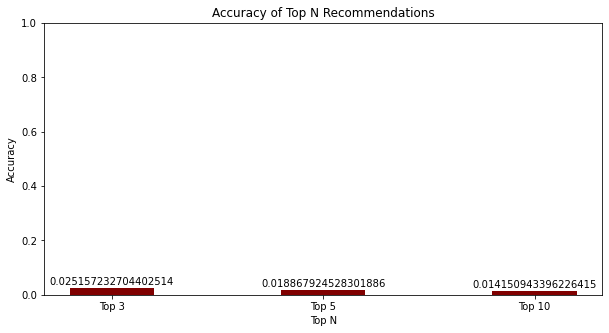

In [80]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i] + 0.01,y[i], ha = 'center')

fig = plt.figure(figsize = (10, 5))
label = ['Top 3', 'Top 5', 'Top 10']
values = [accuracy_df['accuracy_top3'].mean(), accuracy_df['accuracy_top5'].mean(), accuracy_df['accuracy_top10'].mean()]
 
# creating the bar plot
plt.bar(label, values, color ='maroon', width = 0.4)

addlabels(label, values)
plt.xlabel("Top N")
plt.ylabel("Accuracy")
plt.title("Accuracy of Top N Recommendations")
plt.ylim(0,1)
plt.show()

## Precision, Recall, Weighted F-scores

In [81]:
evaluation_df = pd.DataFrame(columns=['precision_top3', 'recall_top3', 'f-score_top3', 
                                      'precision_top5', 'recall_top5', 'f-score_top5',
                                      'precision_top10', 'recall_top10', 'f-score_top10'])
evaluation_df

,precision_top3,recall_top3,f-score_top3,precision_top5,recall_top5,f-score_top5,precision_top10,recall_top10,f-score_top10


In [82]:
beta_sq = 0.5 ** 2

for i in result_df.index:
       
    # top 3
    precision_top3 = result_df.loc[i]['Top 3_num correct'] / 3
    recall_top3 = result_df.loc[i]['Top 3_num correct'] / result_df.loc[i]['actual_num']
    if precision_top3 == 0:
        fscore_top3 = 0
    else:
        fscore_top3 = ((1 + beta_sq) * precision_top3 * recall_top3) / ((beta_sq * precision_top3) + recall_top3)
    
    # top 5
    precision_top5 = result_df.loc[i]['Top 5_num correct'] / 5
    recall_top5 = result_df.loc[i]['Top 5_num correct'] / result_df.loc[i]['actual_num']
    if precision_top5 == 0:
        fscore_top5 = 0
    else:
        fscore_top5 = ((1 + beta_sq) * precision_top5 * recall_top5) / ((beta_sq * precision_top5) + recall_top5)
    
    # top 10
    precision_top10 = result_df.loc[i]['Top 10_num correct'] / 10
    recall_top10 = result_df.loc[i]['Top 10_num correct'] / result_df.loc[i]['actual_num']
    if precision_top10 == 0:
        fscore_top10 = 0
    else:
        fscore_top10 = ((1 + beta_sq) * precision_top10 * recall_top10) / ((beta_sq * precision_top10) + recall_top10)   
        
    evaluation_df.loc[i] = {'precision_top3': precision_top3, 'recall_top3': recall_top3, 'f-score_top3': fscore_top3, 
                            'precision_top5': precision_top5, 'recall_top5': recall_top5, 'f-score_top5': fscore_top5,
                            'precision_top10': precision_top10, 'recall_top10': recall_top10, 'f-score_top10': fscore_top10}
    
evaluation_df

,precision_top3,recall_top3,f-score_top3,precision_top5,recall_top5,f-score_top5,precision_top10,recall_top10,f-score_top10
526666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
228458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
56112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
724631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
overall_evaluation = pd.DataFrame(columns = ['Precision', 'Recall', 'F-score'], 
                                  index = [3, 5, 10])

In [84]:
for i in overall_evaluation.index:
    overall_evaluation.loc[i]['Precision'] = evaluation_df[f'precision_top{i}'].mean()
    overall_evaluation.loc[i]['Recall'] = evaluation_df[f'recall_top{i}'].mean()
    overall_evaluation.loc[i]['F-score'] = evaluation_df[f'f-score_top{i}'].mean()
    
overall_evaluation

,Precision,Recall,F-score
3,0.0251572,0.000379313,0.00176662
5,0.0188679,0.00047078,0.00210722
10,0.0141509,0.000644969,0.00266179


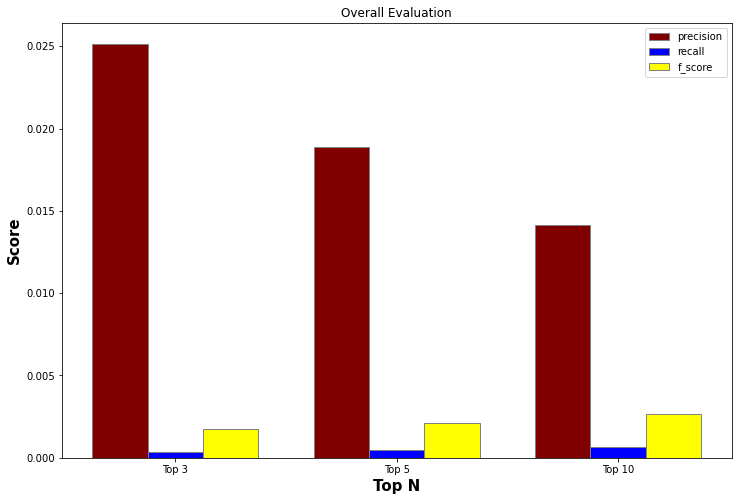

In [85]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
precision = overall_evaluation['Precision']
recall = overall_evaluation['Recall']
f_score = overall_evaluation['F-score']
 
# Set position of bar on X axis
br1 = np.arange(len(precision))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, precision, color ='maroon', width = barWidth,
        edgecolor ='grey', label ='precision')
plt.bar(br2, recall, color = 'blue', width = barWidth,
        edgecolor ='grey', label ='recall')
plt.bar(br3, f_score , color ='yellow', width = barWidth,
        edgecolor ='grey', label ='f_score')
 
# Adding Xticks
plt.xlabel('Top N', fontweight ='bold', fontsize = 15)
plt.ylabel('Score', fontweight ='bold', fontsize = 15)
plt.title("Overall Evaluation")
plt.xticks([r + barWidth for r in range(len(precision))],
        ['Top 3', 'Top 5', 'Top 10'])
 
plt.legend()
plt.show()
